# Name: Shanta Majumder
# ID: 222-35-1183

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing data
1. Checking missing values.
2. Data type problems.
3. Outliers.
4. Basic statistics.
5. Visualizations.

In [3]:
df = pd.read_csv(r"D:\Dataset\LinkedIn_Post_Engagement_Analytics_Medium.csv")
df.head()

,post_id,post_date,post_time,day_of_week,post_type,content_length,hashtags_count,has_media,media_type,impressions,likes,comments,shares,engagement_rate
0,1,2024-03-17,12:15,Sunday,Carousel,480,0,Yes,Image,14550,690,114,82,6.09
1,2,2024-02-28,19:30,Wednesday,Carousel,193,2,Yes,Image,19245,914,88,112,5.79
2,3,2024-03-25,14:45,Monday,Video,288,5,Yes,Video,42471,1735,132,249,4.98
3,4,2024-01-09,10:15,Tuesday,Video,241,0,Yes,Video,26416,1181,209,168,5.90
4,5,2024-03-16,16:45,Saturday,Text,400,5,No,NaN,25902,827,99,60,3.81


In [4]:
df.shape

(300, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          300 non-null    int64  
 1   post_date        300 non-null    object 
 2   post_time        300 non-null    object 
 3   day_of_week      300 non-null    object 
 4   post_type        300 non-null    object 
 5   content_length   300 non-null    int64  
 6   hashtags_count   300 non-null    int64  
 7   has_media        300 non-null    object 
 8   media_type       237 non-null    object 
 9   impressions      300 non-null    int64  
 10  likes            300 non-null    int64  
 11  comments         300 non-null    int64  
 12  shares           300 non-null    int64  
 13  engagement_rate  300 non-null    float64
dtypes: float64(1), int64(7), object(6)
memory usage: 32.9+ KB


In [6]:
df.describe()

,post_id,content_length,hashtags_count,impressions,likes,comments,shares,engagement_rate
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000
mean,150.500000,324.343333,4.873333,25502.573333,910.506667,117.09000,85.113333,4.367667
std,86.746758,110.134543,3.137425,13221.257087,536.418991,81.63678,62.050097,1.066865
min,1.000000,122.000000,0.000000,3228.000000,108.000000,6.00000,3.000000,2.420000
25%,75.750000,233.500000,2.000000,13225.000000,472.000000,47.75000,35.000000,3.505000
50%,150.500000,326.000000,5.000000,26500.000000,852.000000,102.50000,74.500000,4.355000
75%,225.250000,424.000000,8.000000,35841.500000,1249.500000,163.25000,118.250000,5.225000
max,300.000000,499.000000,10.000000,49826.000000,2377.000000,385.00000,319.000000,6.450000


In [7]:
df.media_type.isnull().value_counts()

media_type
False    237
True      63
Name: count, dtype: int64

In [8]:
df.media_type.fillna('Video', inplace=True)

C:\Users\Shant\AppData\Local\Temp\ipykernel_24520\1684424846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.media_type.fillna('Video', inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          300 non-null    int64  
 1   post_date        300 non-null    object 
 2   post_time        300 non-null    object 
 3   day_of_week      300 non-null    object 
 4   post_type        300 non-null    object 
 5   content_length   300 non-null    int64  
 6   hashtags_count   300 non-null    int64  
 7   has_media        300 non-null    object 
 8   media_type       300 non-null    object 
 9   impressions      300 non-null    int64  
 10  likes            300 non-null    int64  
 11  comments         300 non-null    int64  
 12  shares           300 non-null    int64  
 13  engagement_rate  300 non-null    float64
dtypes: float64(1), int64(7), object(6)
memory usage: 32.9+ KB


C:\Users\Shant\AppData\Local\Temp\ipykernel_24520\2657453336.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='content_length', y='shares', ci=None, hue='media_type', ax=axes[0, 2])


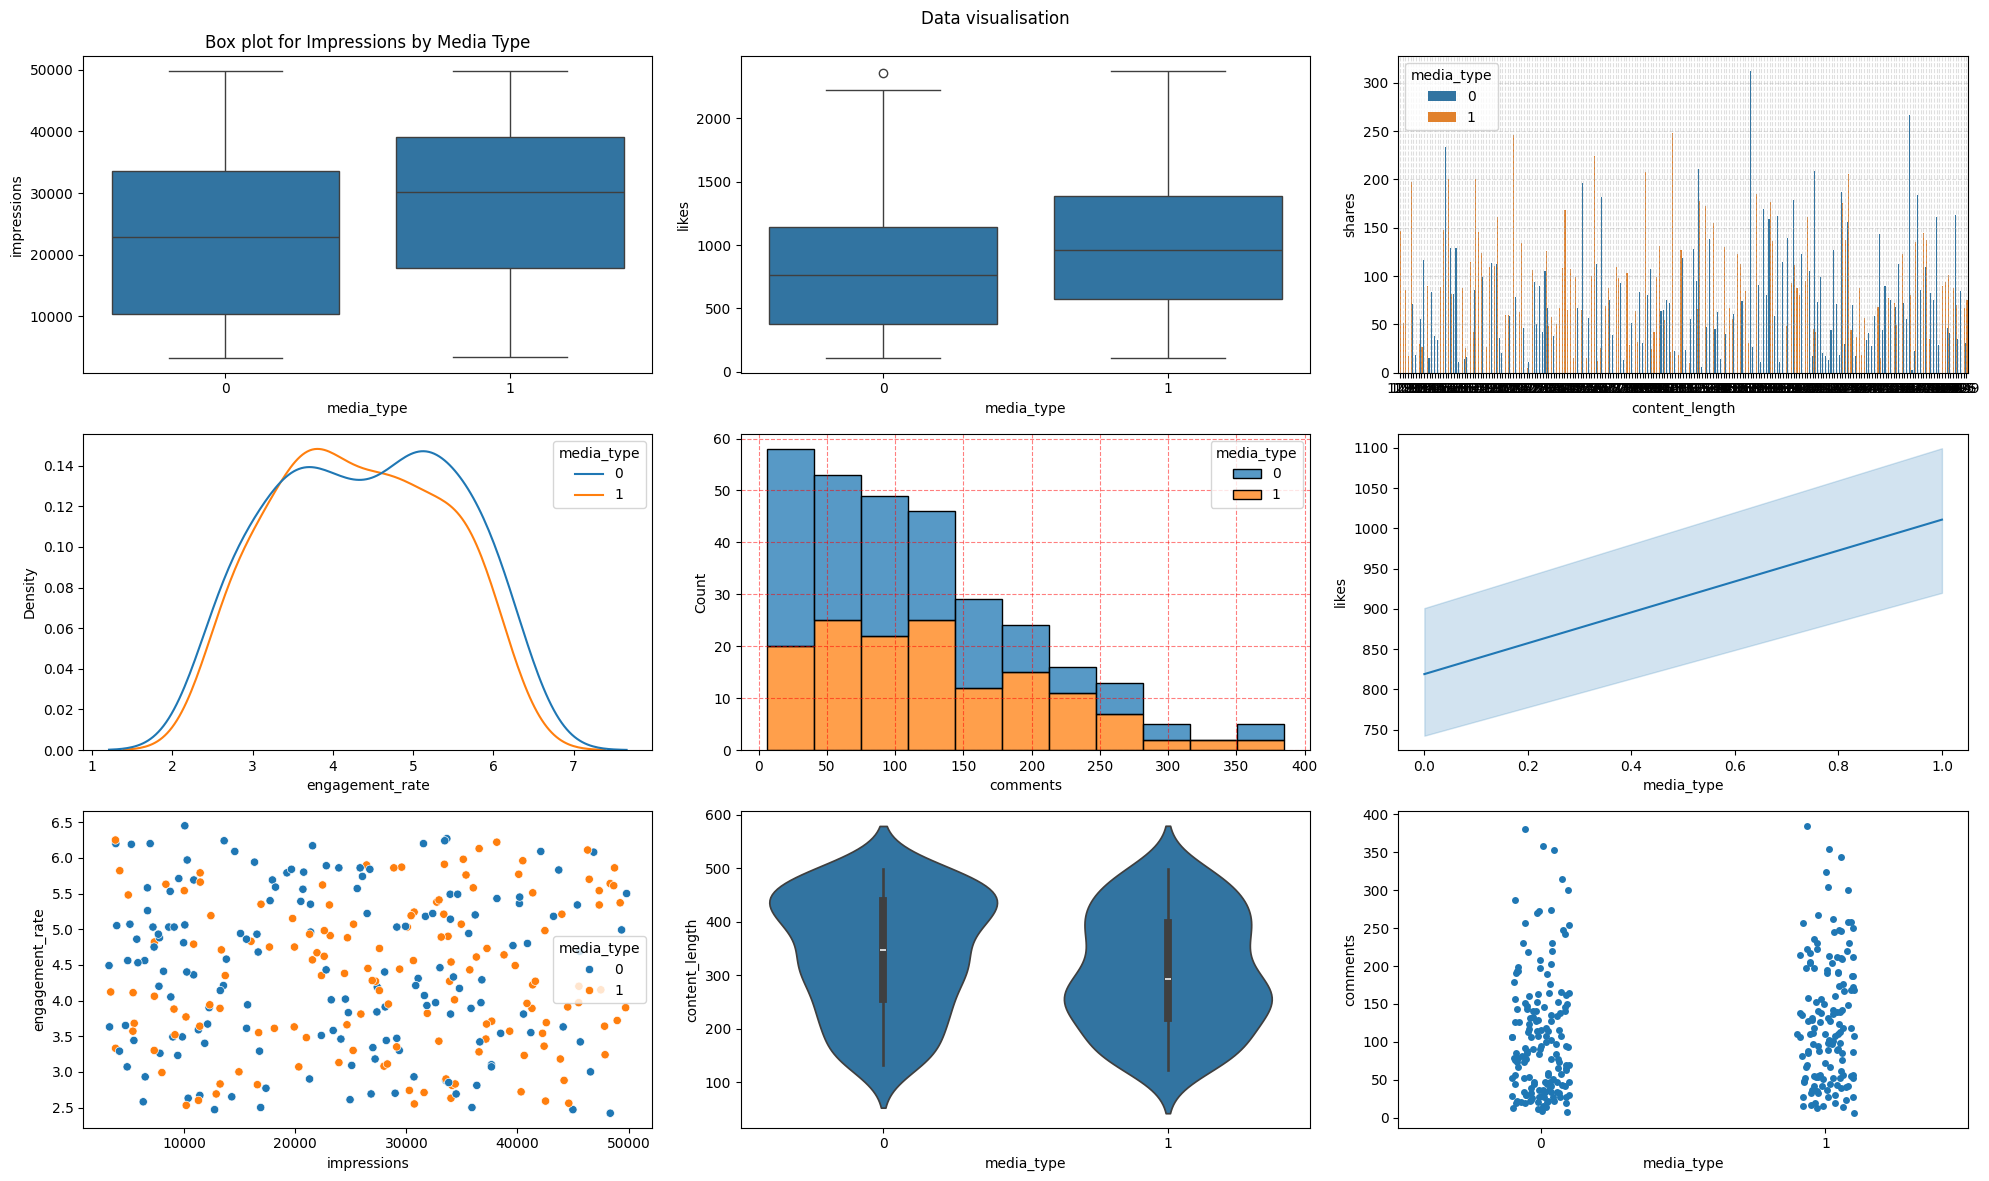

In [40]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12), dpi = 100)
axes[0, 0].set_title("Box plot for Impressions by Media Type")
sns.boxplot(x='media_type', y='impressions', data=df, ax=axes[0, 0])
sns.boxplot(x='media_type', y='likes', data=df, ax=axes[0, 1])
sns.kdeplot(data=df, x='engagement_rate', hue='media_type', ax=axes[1, 0])
sns.histplot(data=df, x='comments', hue='media_type', multiple='stack', ax=axes[1, 1])
axes[1, 1].grid(True, linestyle='--', alpha=0.5, color= 'red')
sns.scatterplot(data=df, x='impressions', y='engagement_rate', hue = 'media_type', ax=axes[2, 0])
sns.violinplot(data=df, x='media_type', y='content_length', orient='v', ax=axes[2, 1])
sns.barplot(data=df, x='content_length', y='shares', ci=None, hue='media_type', ax=axes[0, 2])
axes[0, 2].grid(True, linestyle='--', alpha=0.4)
sns.lineplot(data=df, x='media_type', y='likes', ax=axes[1, 2])
sns.stripplot(data=df, x='media_type', y='comments', orient='v', ax=axes[2, 2])
plt.suptitle('Data visualisation')
plt.tight_layout()
plt.show()

# Preparating dataset for model training
1. Label Encoding
2. Pipelne
3. stacking classifier

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_auc_score, roc_curve, auc, recall_score, precision_score, ConfusionMatrixDisplay

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [14]:
df.head(10)

,post_id,post_date,post_time,day_of_week,post_type,content_length,hashtags_count,has_media,media_type,impressions,likes,comments,shares,engagement_rate
0,1,70,9,3,0,480,0,1,0,14550,690,114,82,6.09
1,2,53,38,6,0,193,2,1,0,19245,914,88,112,5.79
2,3,77,19,1,3,288,5,1,1,42471,1735,132,249,4.98
3,4,7,1,5,3,241,0,1,1,26416,1181,209,168,5.90
4,5,69,27,2,2,400,5,0,1,25902,827,99,60,3.81
5,6,78,33,5,1,277,9,1,0,6483,157,20,13,2.93
6,7,35,24,0,1,489,8,1,0,13529,466,58,46,4.21
7,8,78,46,5,2,428,7,0,1,36022,1592,213,206,5.58
8,9,88,11,0,0,292,6,1,0,28089,912,79,107,3.91
9,10,35,10,0,1,377,0,1,0,24927,535,73,42,2.61


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [16]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10, n_jobs=-1))
])

In [17]:
x = df.drop(['media_type'], axis = 1)
y = df['media_type']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, shuffle=True)

In [19]:
pipe.fit(x_train, y_train)

,steps,"[('scaler', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [20]:
pipe.score(x_test, y_test)

0.9777777777777777

In [21]:
y_pred = pipe.predict(x_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  0],
       [ 2, 45]])

In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.96      0.98        47

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



In [24]:
roc = roc_auc_score(y_test, y_pred)
roc

0.9787234042553192

# Stacking classifier

In [25]:
base_estimators = [
    ('svc', SVC(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42))
]

final_estimator = RandomForestClassifier(random_state=42)

stack = StackingClassifier(
    estimators= base_estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [26]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('stack', stack)
])

In [27]:
pipe.fit(x_train, y_train)

,steps,"[('scaler', ...), ('stack', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimators,"[('svc', ...), ('knn', ...), ...]"
,final_estimator,RandomForestC...ndom_state=42)
,cv,5
,stack_method,'auto'


In [28]:
y_pred = pipe.predict(x_test)

In [29]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        47

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  0],
       [ 0, 47]])

In [31]:
roc = roc_auc_score(y_test, y_pred)
roc

1.0